This file scrapes the viral posts of last year and investigates the time evolution of the posts. Also using NLTK it finds the most common words in their comments. 
These viral posts have a large number of comments which can reveal a lot of information about the content of the post and 
interests of the people on that matter at that time.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import requests
import sys

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
import ast

In [6]:
import random

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
from nltk.probability import FreqDist

In [9]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
from string import punctuation

In [11]:
import nltk
#nltk.download()

In [12]:
from nltk.text import Text

In [13]:
from datetime import datetime, timedelta

In [4]:
from bs4 import BeautifulSoup
from IPython.display import IFrame, HTML


In [14]:
# Here is related to reddit wallstreetbets

req_reddit = requests.get('https://www.reddit.com/r/wallstreetbets/')

In [15]:
page_reddit = req_reddit.text

In [7]:
soup_reddit = BeautifulSoup(page_reddit, 'html.parser')

In [192]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


In [16]:
import praw

In [17]:
reddit = praw.Reddit(
    client_id="-aGDY9TBmHQUEqtqyaLOHQ",
    client_secret="AEcIUFtGbHGIYaNCsbHrhZXIOa77GQ",
    username="PRAW Usage",
    user_agent = 'Soudi'
)

Version 7.4.0 of praw is outdated. Version 7.5.0 was released 7 days ago.


In [18]:
subreddit = reddit.subreddit('wallstreetbets')

In [19]:
top_posts = subreddit.top(time_filter = 'year', limit = 1)
for submission in top_posts:
    if not submission.stickied:
        print(dir(submission))

['STR_FIELD', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_chunk', '_comments_by_id', '_fetch', '_fetch_data', '_fetch_info', '_fetched', '_kind', '_reddit', '_reset_attributes', '_safely_add_arguments', '_url_parts', '_vote', 'all_awardings', 'allow_live_comments', 'approved_at_utc', 'approved_by', 'archived', 'author', 'author_flair_background_color', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'author_flair_text', 'author_flair_text_color', 'author_flair_type', 'author_fullname', 'author_is_blocked', 'author_patreon_flair', 'author_premium', 'award', 'awarders', 'banned_at_utc', 'banned_by', 'can_gild', 'can_mod_post', 'category', 'clear_

In [67]:
scores = []
sub_ids = [] # this is the same as submission id but out of the comment loop
submission_ids = []
upvotes = []
sub_text = []
time_uploads = []
titles = []
urls = []
time_last_visited = []
text = []
first_time_commented = []
last_time_commented = []
middle_comment_time = []
each_comment_time = []


flairs = []

parent_ids = []
comment_ids = []
comment_bodies = []
dict = {}

# Get the top most popular posts of the last year for 1000 posts
top_posts = subreddit.top(time_filter = 'year', limit = 1000)
i = 0
for submission in top_posts:
    if i % 10 == 0:
        out = i * 1. / 1000 * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    
    if not submission.stickied:
        sub_ids.append(submission)
        sub_text.append(submission.selftext)
        flairs.append(submission.link_flair_text)
        titles.append(submission.title)
        scores.append(submission.score)
        time_uploads.append(datetime.fromtimestamp(submission.created))
        urls.append(submission.url)
        upvotes.append(submission.upvote_ratio)
        
        # Here I make a separate dataframe for the comments
        
        comments = submission.comments
        submission.comments.replace_more(limit = 0)
        comment_times = []
        text = []
        
        for comment in submission.comments.list():
            
            submission_ids.append(submission)
            parent_ids.append(comment.parent())
            comment_ids.append(comment.id)
            
            comment_bodies.append(comment.body)
           
            comment_times.append(comment.created_utc)
            each_comment_time.append(datetime.fromtimestamp(comment.created_utc))
        text= comment_bodies   
        #This will make a dictionary of the comments    
        dict[str(submission)] = text    
        
        sorted_comments_times = sorted(comment_times)
        
        # Here I will get the time for the middle comment on a post
        middle_comment = len(sorted_comments_times)/2
      
        middle_comment_time.append(datetime.fromtimestamp(comment_times[int(middle_comment)]))
        
        
        first_time_commented.append(datetime.fromtimestamp(sorted_comments_times[0]))
        last_time_commented.append(datetime.fromtimestamp(sorted_comments_times[-1]))
        i = i + 1

        
df_comments = pd.DataFrame(list(zip(submission_ids, parent_ids, comment_ids,each_comment_time, comment_bodies)),
                           columns = ['submission_id','parent_id','comment_id','comment_time','comment'])    

df_submission = pd.DataFrame(list(zip(sub_ids,flairs, titles, scores, upvotes, time_uploads,first_time_commented,last_time_commented,middle_comment_time, urls, sub_text)), 
                             columns = ['submission_id','Flair','title','score','upvotes','time_upload','first_time_commented','last_time_commented','middle_comment_time','url', 'text'])
#f = open('d:\Machine_Learning\Erdoes_Fall\project\comment_dict.txt', 'w',encoding="utf-8")
#f.write(str(dict))
#f.close()
df_comments.to_csv('d:\Machine_Learning\Erdoes_Fall\project\Reddit_wallstreetTOP_comments.csv', index = False)            
df_submission.to_csv('d:\Machine_Learning\Erdoes_Fall\project\Reddit_wallstreetTOP_mainSubmission.csv', index = False)        

99%

In [107]:
f = open('d:\Machine_Learning\Erdoes_Fall\project\comment_dict.txt','r',encoding="utf-8")
contents = f.read()
dictionary = ast.literal_eval(contents)

f.close()

In [227]:
dictionary.keys()

dict_keys(['l8rf4k', 'l6wu59', 'l78uct', 'l846a1', 'l881ia', 'l6x130', 'lnqgz8', 'l6ekdz', 'lae6j0', 'l8c0u4'])

In [16]:
df_submission = pd.read_csv('d:\Machine_Learning\Erdoes_Fall\project\Reddit_wallstreetTOP_mainSubmission.csv', index_col = False)

In [17]:
df_comments = pd.read_csv('d:\Machine_Learning\Erdoes_Fall\project\Reddit_wallstreetTOP_comments.csv',index_col = False)

In [18]:
df_submission.head()

,submission_id,Flair,title,score,upvotes,time_upload,first_time_commented,last_time_commented,middle_comment_time,url,text
0,l8rf4k,YOLO,Times Square right now,429585,0.98,2021-01-30 10:00:38,2021-01-30 10:00:52,2021-03-25 19:02:33,2021-01-31 14:26:30,https://v.redd.it/x64z70f7eie61,NaN
1,l6wu59,News,UPVOTE so everyone sees we got SUPPORT,321921,0.97,2021-01-28 05:40:34,2021-01-28 05:41:29,2021-02-02 09:12:03,2021-01-31 16:35:32,https://i.redd.it/sgoqy8nyt2e61.png,NaN
2,l78uct,YOLO,GME YOLO update — Jan 28 2021,285817,0.97,2021-01-28 13:06:23,2021-01-28 13:06:30,2021-01-29 00:29:43,2021-01-28 13:08:16,https://i.redd.it/opzucppb15e61.png,NaN
3,l846a1,YOLO,GME YOLO month-end update — Jan 2021,255201,0.97,2021-01-29 13:04:45,2021-01-29 13:04:45,2021-02-01 10:57:13,2021-01-29 13:08:12,https://i.redd.it/r557em3t5ce61.png,NaN
4,l881ia,Meme,It’s treason then,230249,0.97,2021-01-29 15:40:59,2021-01-29 15:41:50,2021-01-30 11:48:17,2021-01-29 17:24:49,https://i.redd.it/d3t66lv1yce61.jpg,NaN


In [25]:
test = reddit.submission('l8rf4k')
test.title

'Times Square right now'

In [24]:
df_submission.describe()

,score,upvotes
count,1000.000000,1000.000000
mean,57734.247000,0.926680
std,38884.499131,0.048507
min,26076.000000,0.610000
25%,32532.500000,0.900000
50%,43969.500000,0.940000
75%,68778.500000,0.962500
max,429585.000000,0.990000


In [35]:
pd.to_datetime(df_submission.middle_comment_time[0])-pd.to_datetime(df_submission.first_time_commented[0])

Timedelta('1 days 04:25:38')

In [77]:
df_submission['duration_middle'] = pd.to_datetime(df_submission.middle_comment_time) - pd.to_datetime(df_submission.first_time_commented)
df_submission['duration_total'] = pd.to_datetime(df_submission.last_time_commented)- pd.to_datetime(df_submission.first_time_commented)

In [102]:
test = df_submission.duration_total[2]
print(type(test))
test.total_seconds()/60

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


683.2166666666667

In [124]:
str(df_submission.submission_id[1])

'l6wu59'

In [62]:
df_comments.head()

,submission_id,parent_id,comment_id,comment_time,comment
0,l8rf4k,l8rf4k,gle3n41,2021-01-30 10:20:13,Someone needs to open a GameStop across the ny...
1,l8rf4k,l8rf4k,gle2wqt,2021-01-30 10:14:38,Bro wtf... 2021 is crazy.
2,l8rf4k,l8rf4k,gle1mvf,2021-01-30 10:04:57,This is the hype we need for next week!\n\nWE ...
3,l8rf4k,l8rf4k,gle1nwd,2021-01-30 10:05:11,This is easily one of the greatest things to h...
4,l8rf4k,l8rf4k,gle391u,2021-01-30 10:17:16,Just when you think this sub can't be any dumb...


In [63]:
df_comments.submission_id.value_counts()

l8rf4k    490
l6wu59    479
Name: submission_id, dtype: int64

In [22]:
# Here I make a dictionary containing all comments for each post. submission number of each post is the key and all the 
# comments on that post is the value.
dict = {}
submissions = df_comments.submission_id
total = len(submissions)
i=0
for submission in submissions:
    if i % 10 == 0:
        out = i * 1./total * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    text = []
    for comment in df_comments.loc[df_comments.submission_id == submission, 'comment']:
        text.append(comment)   
    dict[str(submission)] = text



KeyboardInterrupt: 

In [66]:
dict.keys()

dict_keys(['l8rf4k', 'l6wu59'])

# Visualization 

In [71]:
Flairs = df_submission.Flair.value_counts()[:10].index
Flairs_Values = df_submission.Flair.value_counts()[:10].values

In [72]:
df_submission.Flair.value_counts()[:10]

Meme          373
News          259
Discussion    114
YOLO           58
Gain           47
Loss           35
Shitpost       17
Chart          16
DD             11
Mods            6
Name: Flair, dtype: int64

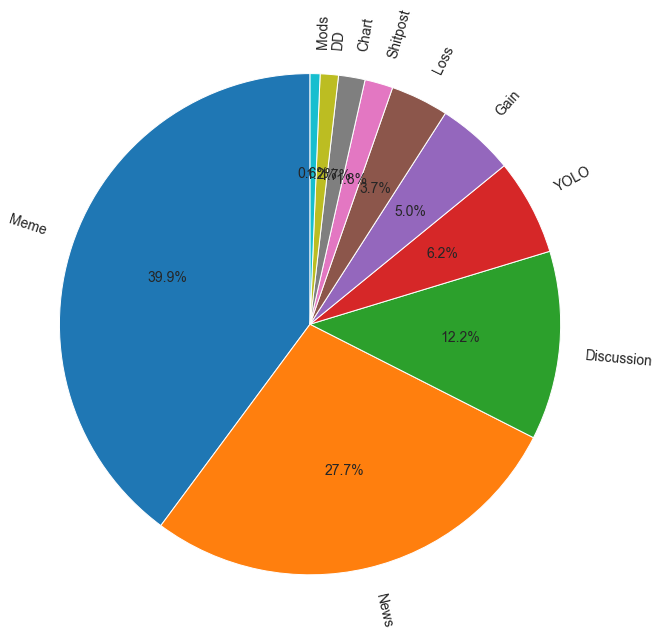

In [75]:
labels = Flairs
sizes = Flairs_Values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, rotatelabels = True,textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('d:\Machine_Learning\Erdoes_Fall\project\PieChart_Flairs.svg')
plt.savefig('d:\Machine_Learning\Erdoes_Fall\project\PieChart_Flairs.jpeg')
plt.show()

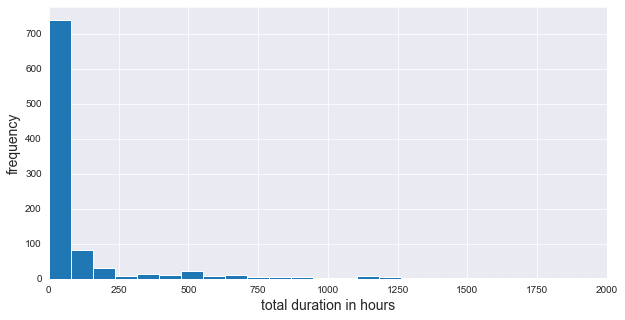

In [92]:
plt.figure(figsize = (10,5))
duration_total_minutes = [t.total_seconds()/3600 for t in df_submission.duration_total]
plt.hist(duration_total_minutes, bins = 100)
plt.xlabel('total duration in hours', fontsize = 14)
plt.ylabel('frequency', fontsize = 14)
plt.xlim(left = 0, right = 2000)
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\totalduration.jpeg')
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\totalduration.svg')
plt.show()

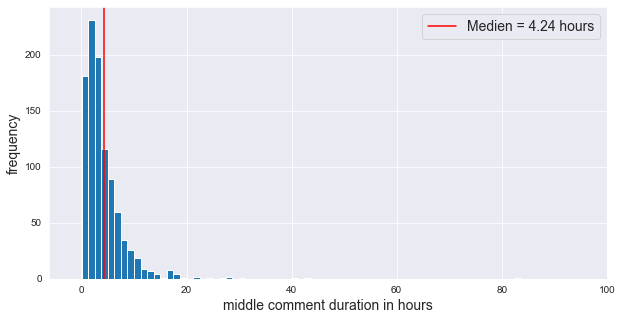

In [93]:
plt.figure(figsize = (10,5))
duration_total_minutes = [t.total_seconds()/3600 for t in df_submission.duration_middle]
plt.hist(duration_total_minutes, bins = 100)
plt.axvline(x = np.mean(df_submission.duration_middle).total_seconds()/3600, label = 'Medien = 4.24 hours', color = 'r')
plt.xlabel('middle comment duration in hours', fontsize = 14)
plt.ylabel('frequency', fontsize = 14)
plt.legend(loc = 'best', fontsize = 14)
plt.xlim( right = 100)
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\middleCommentTime.jpeg')
plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\middleCommentTime.svg')
plt.show()

In [168]:
times = df_comments.loc[df_comments.submission_id == 'l8rf4k', 'comment_time']
sorted_times = sorted(times)
durations = times - sorted_times[0]
comment_time_from_start = [t.total_seconds()/3600 for t in durations]

In [180]:
min(comment_time_from_start)

0.0

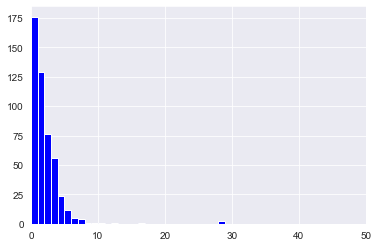

In [193]:
# Here I am plotting the number of comments per hour for a post
#plt.figure(figsize = (10,6))
binwidth = 1
plt.hist(comment_time_from_start, bins=np.arange(min(comment_time_from_start), max(comment_time_from_start) + binwidth, binwidth), color = 'blue')
plt.xlim(left = 0, right = 50)
plt.show()

In [251]:
submission = df_submission.submission_id[0]
score_value = df_submission.loc[df_submission.submission_id == submission, 'score']
score_value.to_string(index = False)

' 429585'

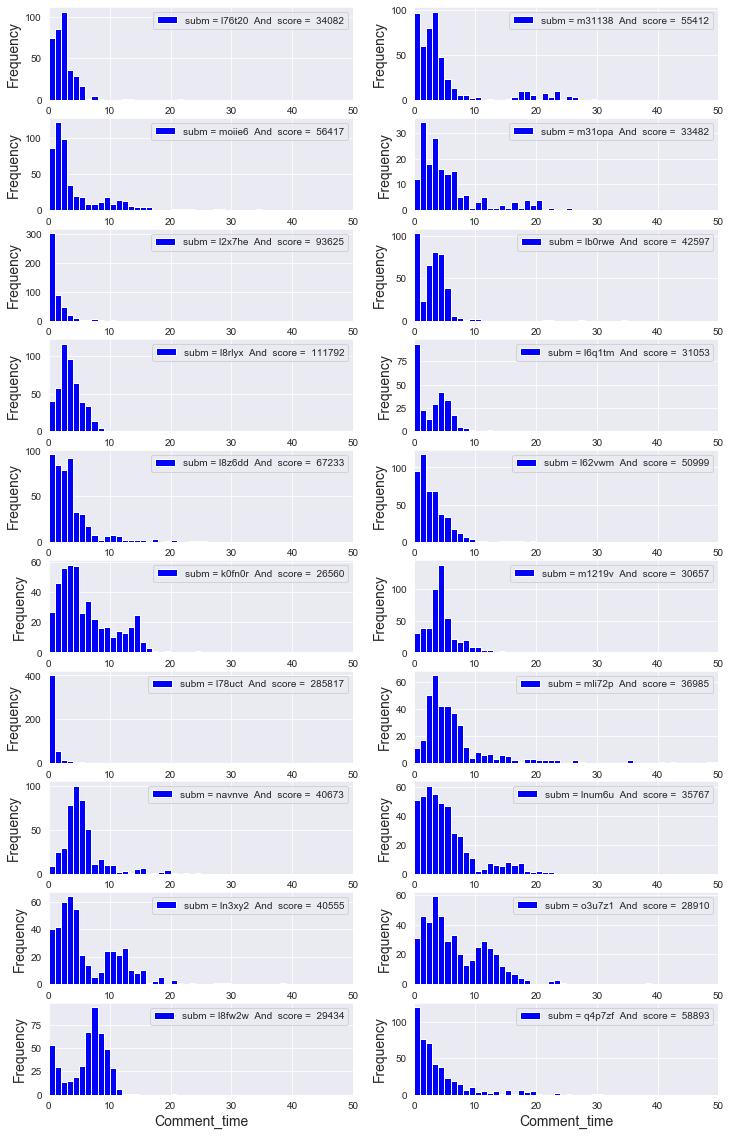

In [142]:
ids = random.sample(list(df_submission.submission_id.apply(str)), 20)
binwidth = 1
fig,ax = plt.subplots(10,2,figsize=(12,20))
for i in range(20):
    submission = ids[i]
    scores = df_submission.loc[df_submission.submission_id == submission, 'score']
    times = df_comments.loc[df_comments.submission_id == submission, 'comment_time']
    sorted_times = sorted(times)
    durations = pd.to_datetime(times) - pd.to_datetime(sorted_times[0])
    comment_time_from_start = [t.total_seconds()/3600 for t in durations]
    ax[i//2,i%2].hist(comment_time_from_start,
                      bins=np.arange(min(comment_time_from_start), max(comment_time_from_start) + binwidth, binwidth),
                      color = 'b', label = ('subm = '+ str(submission)+'  And  '+'score = '+ scores.to_string(index = False)))
    ax[i//2,i%2].set_xlim(left = 0, right = 50)
    ax[i//2,i%2].set_xlabel('Comment_time', fontsize = 14)
    ax[i//2, i%2].set_ylabel('Frequency', fontsize = 14)
    ax[i//2, i%2].legend(loc = 'best', fontsize = 10)
#plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\comment_time_hist_4.jpeg')
#plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\comment_time_hist_4.svg')
plt.show()


In [140]:
low_scores = df_submission.loc[df_submission.score < 26500, 'submission_id']
high_scores = df_submission.loc[df_submission.score > 200000, 'submission_id']
ids = low_scores.append(high_scores)
print(len(low_scores), len(high_scores))
len(ids)

15 11


26

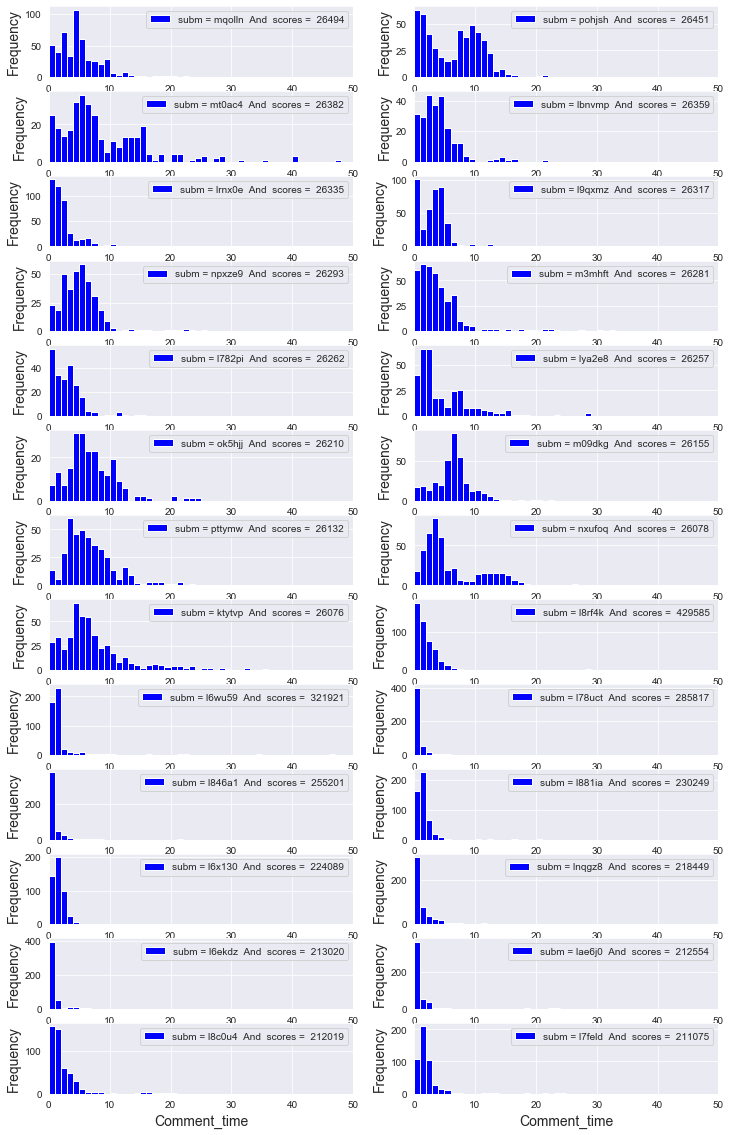

In [141]:
low_scores = df_submission.loc[df_submission.score < 26500, 'submission_id']
high_scores = df_submission.loc[df_submission.score > 200000, 'submission_id']
ids = low_scores.append(high_scores)
ids.reset_index(drop = True, inplace = True)
binwidth = 1
fig,ax = plt.subplots(int(len(ids)/2),2,figsize=(12,20))
for i in range(len(ids)):
    submission = ids[i]
    scores = df_submission.loc[df_submission.submission_id == submission, 'score']
    times = df_comments.loc[df_comments.submission_id == submission, 'comment_time']
    sorted_times = sorted(times)
    durations = pd.to_datetime(times) - pd.to_datetime(sorted_times[0])
    comment_time_from_start = [t.total_seconds()/3600 for t in durations]
    ax[i//2,i%2].hist(comment_time_from_start,
                      bins=np.arange(min(comment_time_from_start), max(comment_time_from_start) + binwidth, binwidth),
                      color = 'b', label = ('subm = '+ str(submission)+'  And  '+'scores = '+ scores.to_string(index = False)))
    ax[i//2,i%2].set_xlim(left = 0, right = 50)
    ax[i//2,i%2].set_xlabel('Comment_time', fontsize = 14)
    ax[i//2, i%2].set_ylabel('Frequency', fontsize = 14)
    ax[i//2, i%2].legend(loc = 'best', fontsize = 10)
#plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\comment_time_hist_lowHigh_upvotes.jpeg')
#plt.savefig('d:\\Machine_Learning\\Erdoes_Fall\\project\\comment_time_hist_lowHigh_upvotes.svg')
plt.show()

# This section is related to analyzing the comments

In [213]:
print(stop_words)

{'on', 'where', 'too', 'he', 'you', 'whom', 'those', 'did', 'so', 'by', 'during', 'themselves', 'there', 'haven', 'will', 're', 'itself', 'll', 'doesn', "it's", 'a', 'if', 'm', "aren't", 'aren', 'doing', 's', "mustn't", '’', 'her', 'have', 'very', 'were', "should've", 'some', 'shouldn', "shouldn't", "doesn't", 'me', 'few', "you're", 'or', 'each', 'wasn', 'then', "didn't", 'been', 'yourselves', 'under', 'other', 'she', 'but', 'than', 'does', 'who', "that'll", 'through', 'yourself', 'their', 'as', 'down', 'ours', 'why', 'any', "wouldn't", 'most', "hadn't", "don't", 'after', 'between', 'same', 'hadn', 'am', "haven't", 'ma', 'mightn', 'your', 'before', "hasn't", 'can', 'which', 'in', 'above', "'s", 'has', 'i', 'herself', 'all', 'is', 'theirs', 'himself', 'd', "couldn't", 'ourselves', 'out', 'isn', 'both', 'off', 'be', 'needn', 'about', 'with', 'couldn', 'them', "wasn't", 'no', "n't", 'an', 'do', 'once', 'was', 'yours', 'only', 'of', 'myself', 'ain', 'having', 'such', 'that', 'its', "won't"

In [143]:
stop_words = set(stopwords.words('english'))

In [247]:
for element in ['I',"'s", "n't", '’',"'m","'re",'would','``','...','deleted','removed',"''",'fucking','fuck','like']:
     stop_words.add(element)

In [145]:
punctuation = list(punctuation)

In [146]:
low_scores = df_submission.loc[df_submission.score < 26500, 'submission_id']
high_scores = df_submission.loc[df_submission.score > 200000, 'submission_id']
ids = low_scores.append(high_scores)

In [156]:
dictionary = {}
total = len(ids)
print(total)
i=0
for submission in ids:
    if i % 10 == 0:
        out = (i * 1./total) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    text = []
    for comment in df_comments.loc[df_comments.submission_id == submission, 'comment']:
        text.append(comment)   
    dictionary[str(submission)] = text
    i = i +1

26
76%

In [185]:
dictionary.keys()

dict_keys(['mqolln', 'pohjsh', 'mt0ac4', 'lbnvmp', 'lrnx0e', 'l9qxmz', 'npxze9', 'm3mhft', 'l782pi', 'lya2e8', 'ok5hjj', 'm09dkg', 'pttymw', 'nxufoq', 'ktytvp', 'l8rf4k', 'l6wu59', 'l78uct', 'l846a1', 'l881ia', 'l6x130', 'lnqgz8', 'l6ekdz', 'lae6j0', 'l8c0u4', 'l7feld'])

In [159]:
ps = PorterStemmer()

In [248]:
most_common_list = []
scores = []
i = 0
for submission in ids:
    if i % 10 == 0:
        out = (i * 1./total) * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
    comment_container = dictionary[str(submission)]
    listToStr = ' '.join([str(elem) for elem in comment_container])
    list_words = word_tokenize(listToStr)
    filtered_stopwords = [w for w in list_words if not w.lower() in stop_words]
    filtered_all = [w for w in filtered_stopwords if not w in punctuation]
    filtered_stems = [ps.stem(w) for w in filtered_all]
    fdist = FreqDist(filtered_stems)
    most_common_list.append(fdist.most_common(10))
    score_index = df_submission.loc[df_submission.submission_id == submission, 'score']
    scores.append(score_index.to_string(index = False))
    i = i + 1

Most_common_df = pd.DataFrame(list(zip(pd.Series(most_common_list), scores)), columns = ['list of common words','scores'])

76%

In [251]:
Most_common_df

,list of common words,scores
0,"[(gme, 116), (share, 54), (day, 53), (buy, 53)...",26494
1,"[(truck, 81), (live, 56), (get, 54), (one, 53)...",26451
2,"[(get, 48), (http, 34), (autist, 27), (money, ...",26382
3,"[(gme, 30), (hold, 28), (buy, 25), (stock, 21)...",26359
4,"[(amc, 112), (hold, 56), (share, 53), (http, 5...",26335
5,"[(short, 112), (hold, 67), (squeez, 66), (stoc...",26317
6,"[(sell, 49), (32, 48), (http, 42), (movi, 37),...",26293
7,"[(stock, 65), (peopl, 51), (ape, 28), (love, 2...",26281
8,"[(http, 33), (32, 24), (get, 16), (post, 16), ...",26262
9,"[(gme, 44), (portfolio, 36), (week, 29), (go, ...",26257
